# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ3 ¬´–ö–ª–∞—Å—Ç–µ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö¬ª

### –í–∞—Ä–∏–∞–Ω—Ç 6

## –ò–º–ø–æ—Ä—Ç—ã –∏ –±–∞–∑–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã / –ú–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –∏ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [38]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

p = 3
q = 4
w = [0.19, 0.25, 0.20, 0.36]

def euclidean(a, b):
    return distance.euclidean(a, b)

def manhattan(a, b):
    return distance.cityblock(a, b)

def euclidean_w(a, b):
    return distance.euclidean(a, b, w)

def stepen(a, b):
    sum_ = sum(abs(a[e] - b[e]) ** p for e in range(len(a)))
    return sum_ ** (1 / q)

def calc_centroid(a):
    return np.mean(a, axis=0)


## –ö–ª–∞—Å—Å –∫–ª–∞—Å—Ç–µ—Ä–∞ –∏ –∞–ª–≥–æ—Ä–∏—Ç–º –∞–≥–ª–æ–º–µ—Ä–∞—Ç–∏–≤–Ω–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

In [39]:
all_type = {
    '–µ–≤–∫–ª–∏–¥–æ–≤–æ': euclidean,
    '–º–∞–Ω—Ö—ç—Ç—Ç–µ–Ω—Å–∫–æ–µ': manhattan,
    '–≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ –µ–≤–∫–ª–∏–¥–æ–≤–æ': euclidean_w,
    '—Å—Ç–µ–ø–µ–Ω–Ω–æ–µ': stepen
}

class Cluster:
    def __init__(self, objects, distance=0.0, name=None):
        self.name = name
        self.distance = distance
        self.objects = objects

    def get_distance(self, cluster, type_calc, is_min=True):
        base = all_type[type_calc](self.objects[0], cluster.objects[0])
        for obj in self.objects:
            for other in cluster.objects:
                d = all_type[type_calc](obj, other)
                if is_min and d < base:
                    base = d
                elif not is_min and d > base:
                    base = d
        return base

    def get_distance_centroid(self, cluster, type_calc):
        return all_type[type_calc](
            calc_centroid(self.objects), calc_centroid(cluster.objects)
        )

    def get_distance_average(self, cluster, type_calc):
        total = sum(all_type[type_calc](a, b)
                    for a in self.objects for b in cluster.objects)
        return total / (len(self.objects) + len(cluster.objects))


class CalcSimilar:
    def __init__(self, df, max_len_cluster, type_calc):
        self.df = df
        self.max_len_cluster = max_len_cluster
        self.type_calc = type_calc

    def calculate(self, method):
        methods = {
            '–æ–¥–∏–Ω–æ—á–Ω–æ–π —Å–≤—è–∑–∏': self.near_neighbor,
            '–ø–æ–ª–Ω—ã—Ö —Å–≤—è–∑–µ–π': self.dist_neighbor,
            '—Ü–µ–Ω—Ç—Ä–æ–∏–¥–Ω—ã–π': self.centroid,
            '—Å—Ä–µ–¥–Ω–∏—Ö —Å–≤—è–∑–µ–π': self.average_linkage,
            '–£–æ—Ä–¥–∞': self.ward
        }
        return methods[method]()

    def cluster_iter(self, dist_func):
        clusters = [Cluster([self.df[i]], 0, i) for i in range(len(self.df))]
        final_clusters = []

        while len(clusters) > 1:
            min_dist = float('inf')
            pair = None
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    d = dist_func(clusters[i], clusters[j])
                    if d < min_dist and len(clusters[i].objects) + len(clusters[j].objects) <= self.max_len_cluster:
                        min_dist = d
                        pair = (i, j)

            if pair is None:
                break

            i, j = pair
            new_cluster = Cluster(clusters[i].objects + clusters[j].objects, min_dist)

            # –£–¥–∞–ª—è–µ–º –æ–±—ä–µ–¥–∏–Ω–∏–≤—à–∏–µ—Å—è –∫–ª–∞—Å—Ç–µ—Ä—ã
            for idx in sorted([i, j], reverse=True):
                del clusters[idx]

            # –ï—Å–ª–∏ –¥–æ—Å—Ç–∏–≥–ª–∏ –º–∞–∫—Å. —Ä–∞–∑–º–µ—Ä–∞ ‚Äî —Å—Ä–∞–∑—É –∫–∏–¥–∞–µ–º –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
            if len(new_cluster.objects) == self.max_len_cluster:
                final_clusters.append(new_cluster)
            else:
                clusters.append(new_cluster)

        # –î–æ–±–∞–≤–ª—è–µ–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –∫–ª–∞—Å—Ç–µ—Ä—ã, –µ—Å–ª–∏ –æ–Ω–∏ –Ω–µ –ø—É—Å—Ç—ã–µ
        final_clusters.extend([c for c in clusters if len(c.objects) <= self.max_len_cluster])

        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –∏–Ω–¥–µ–∫—Å—ã
        results = []
        for cluster in final_clusters:
            cl_idx = []
            for obj in cluster.objects:
                for idx, orig in enumerate(self.df):
                    if np.array_equal(obj, orig):
                        cl_idx.append(idx)
                        break
            cl_idx.sort()
            if cl_idx not in results:
                results.append(cl_idx)

        return results


    def near_neighbor(self):
        return self.cluster_iter(lambda a, b: a.get_distance(b, self.type_calc, True))

    def dist_neighbor(self):
        return self.cluster_iter(lambda a, b: a.get_distance(b, self.type_calc, False))

    def centroid(self):
        return self.cluster_iter(lambda a, b: a.get_distance_centroid(b, self.type_calc))

    def average_linkage(self):
        return self.cluster_iter(lambda a, b: a.get_distance_average(b, self.type_calc))

    def ward(self):
        labels = np.arange(len(self.df))
        clusters = [[x] for x in self.df]
        while len(clusters) > 1:
            min_dist = float('inf')
            best = None
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    if len(clusters[i]) + len(clusters[j]) <= self.max_len_cluster:
                        d = self.ward_distance(clusters[i], clusters[j])
                        if d < min_dist:
                            min_dist = d
                            best = (i, j)
            if best is None:
                break
            i, j = best
            clusters[i].extend(clusters.pop(j))
        result = [[] for _ in range(len(clusters))]
        for i, cluster in enumerate(clusters):
            for obj in cluster:
                idx = self.df.index(obj)
                result[i].append(idx)
        return [r for r in result if r]

    def ward_distance(self, a, b):
        n1, n2 = len(a), len(b)
        m1, m2 = np.mean(a, axis=0), np.mean(b, axis=0)
        return (n1 * n2) / (n1 + n2) * all_type[self.type_calc](m1, m2)



## –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–∞–±–ª–∏—Ü–∞ –æ–±—ä–µ–∫—Ç–æ–≤)

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

raw_data = '''
98 74 95 24 18 30 78 95 58 74 97 12 52 92 96 98 18 41 46 86 43 31 24 93 49 84 53
59 34 10 24 55 27 66 29 57 54 10 13 72 22 42 25 74 88 67 17 18 99 73 42 30 71 17
30 86 12 42 55 33 44 54 72 72 80 69 88 75 45 99 13 73 90 84 33 37 47 88 29 85 54
37 81 93 12 31 97 49 33 53 36 62 61 76 91 33 34 99 94 69 79 39 86 70 43 47 48 66
'''


rows = raw_data.strip().split('\n')
data = np.array([[int(x) for x in r.strip().split()] for r in rows]).T
df = pd.DataFrame(data, columns=['X1', 'X2', 'X3', 'X4'])

display(df.head())
print(f"–û–±—ä–µ–∫—Ç–æ–≤: {df.shape[0]}, –ü—Ä–∏–∑–Ω–∞–∫–æ–≤: {df.shape[1]}")


X1  X2  X3  X4
0  98  59  30  37
1  74  34  86  81
2  95  10  12  93
3  24  24  42  12
4  18  55  55  31

–û–±—ä–µ–∫—Ç–æ–≤: 27, –ü—Ä–∏–∑–Ω–∞–∫–æ–≤: 4


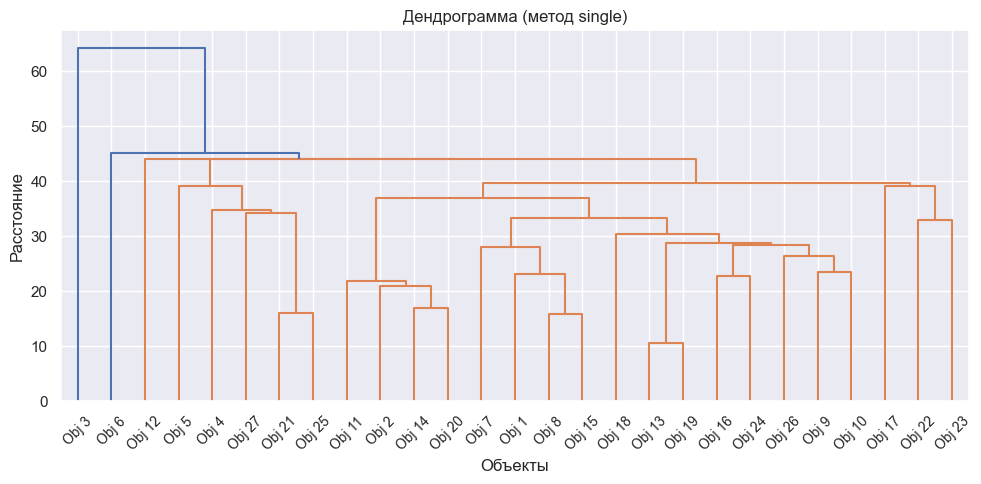

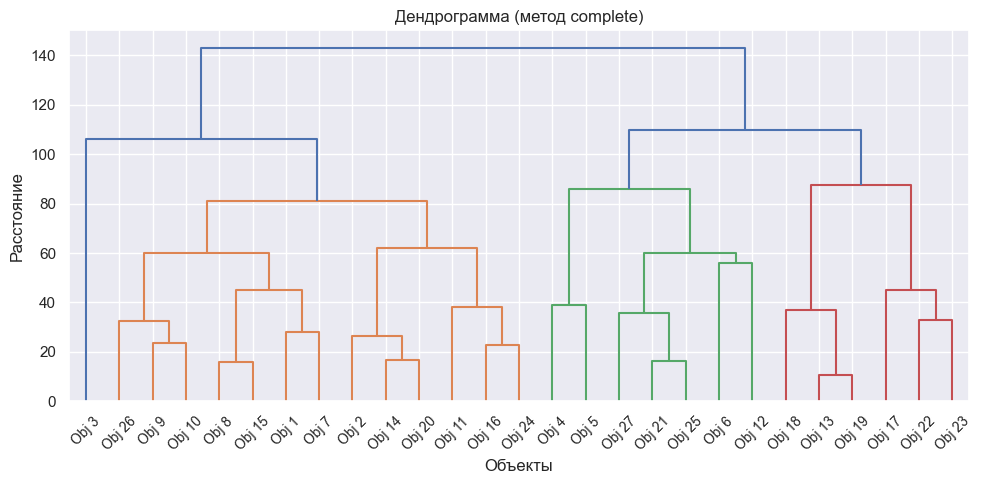

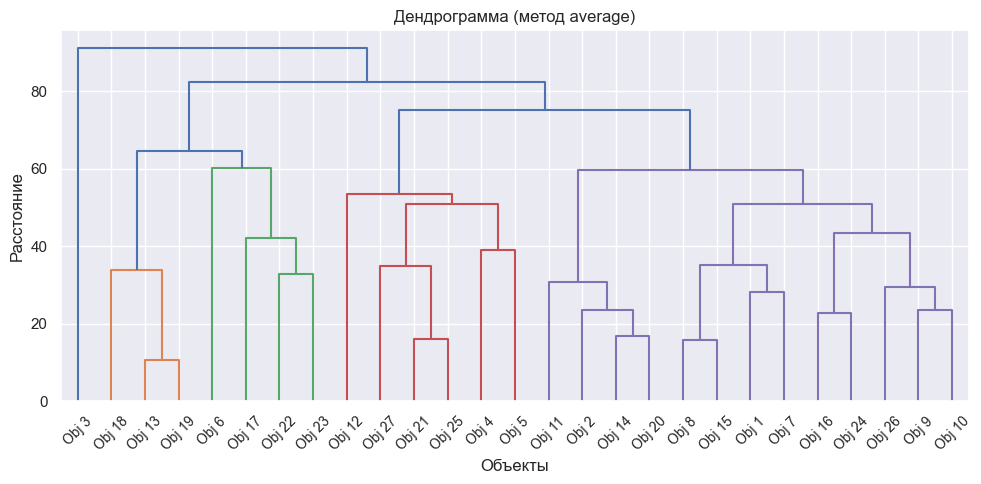

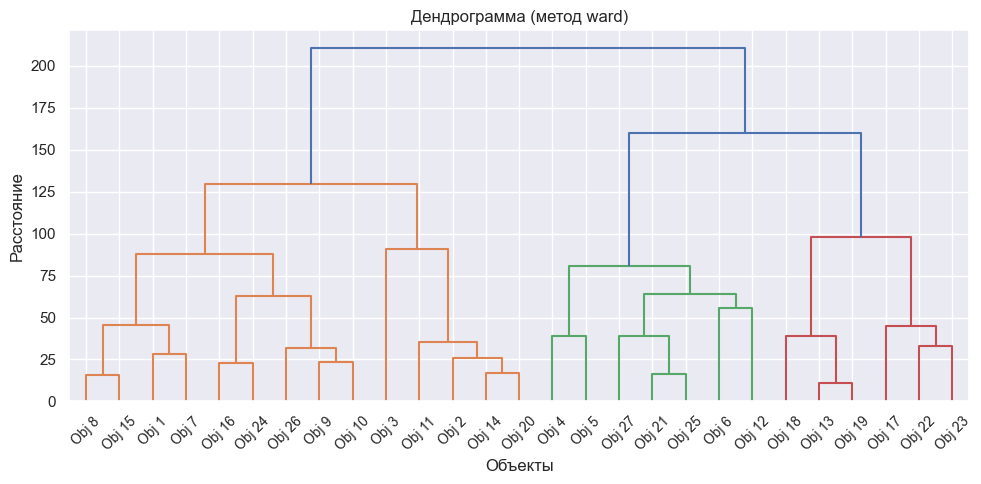

In [41]:
linkage_methods = ['single', 'complete', 'average', 'ward']
sns.set()

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(
        sch.linkage(df.values, method=method),
        labels=[f"Obj {i+1}" for i in range(len(df))]
    )
    plt.title(f"–î–µ–Ω–¥—Ä–æ–≥—Ä–∞–º–º–∞ (–º–µ—Ç–æ–¥ {method})")
    plt.xlabel("–û–±—ä–µ–∫—Ç—ã")
    plt.ylabel("–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ")
    plt.tight_layout()
    plt.show()

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≤—Å–µ—Ö 6 –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–π

In [42]:
from IPython.display import display, Markdown
import pandas as pd

for method_un in methods_union:
    for method_sim in methods_sim:
        model = CalcSimilar(df_list, max_cl, method_sim)
        clusters = model.calculate(method_un)

        cluster_matrix[(method_un, method_sim)] = clusters

        display(Markdown(f"### üîπ –ú–µ—Ç–æ–¥: **{method_un}** | –ú–µ—Ç—Ä–∏–∫–∞: **{method_sim}**"))

        # –§–æ—Ä–º–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É
        cluster_data = {
            "–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞": [],
            "–û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)": []
        }

        for i, cl in enumerate(clusters, 1):
            cluster_data["–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞"].append(f"–ö–ª–∞—Å—Ç–µ—Ä {i}")
            cluster_data["–û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)"].append(", ".join(str(x + 1) for x in sorted(cl)))

        df_clusters = pd.DataFrame(cluster_data)
        display(df_clusters)


### üîπ –ú–µ—Ç–æ–¥: **–æ–¥–∏–Ω–æ—á–Ω–æ–π —Å–≤—è–∑–∏** | –ú–µ—Ç—Ä–∏–∫–∞: **—Å—Ç–µ–ø–µ–Ω–Ω–æ–µ**

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)
0      –ö–ª–∞—Å—Ç–µ—Ä 1   9, 10, 13, 18, 19, 26
1      –ö–ª–∞—Å—Ç–µ—Ä 2   2, 11, 14, 16, 20, 24
2      –ö–ª–∞—Å—Ç–µ—Ä 3     4, 5, 6, 21, 25, 27
3      –ö–ª–∞—Å—Ç–µ—Ä 4          12, 17, 22, 23
4      –ö–ª–∞—Å—Ç–µ—Ä 5          1, 3, 7, 8, 15

### üîπ –ú–µ—Ç–æ–¥: **–æ–¥–∏–Ω–æ—á–Ω–æ–π —Å–≤—è–∑–∏** | –ú–µ—Ç—Ä–∏–∫–∞: **–≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ –µ–≤–∫–ª–∏–¥–æ–≤–æ**

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)
0      –ö–ª–∞—Å—Ç–µ—Ä 1  13, 17, 18, 19, 22, 23
1      –ö–ª–∞—Å—Ç–µ—Ä 2    4, 5, 12, 21, 25, 27
2      –ö–ª–∞—Å—Ç–µ—Ä 3     2, 3, 6, 11, 14, 20
3      –ö–ª–∞—Å—Ç–µ—Ä 4       9, 10, 16, 24, 26
4      –ö–ª–∞—Å—Ç–µ—Ä 5             1, 7, 8, 15

### üîπ –ú–µ—Ç–æ–¥: **—Å—Ä–µ–¥–Ω–∏—Ö —Å–≤—è–∑–µ–π** | –ú–µ—Ç—Ä–∏–∫–∞: **—Å—Ç–µ–ø–µ–Ω–Ω–æ–µ**

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)
0      –ö–ª–∞—Å—Ç–µ—Ä 1  13, 17, 18, 19, 22, 23
1      –ö–ª–∞—Å—Ç–µ—Ä 2           2, 11, 14, 20
2      –ö–ª–∞—Å—Ç–µ—Ä 3               6, 12, 27
3      –ö–ª–∞—Å—Ç–µ—Ä 4             1, 7, 8, 15
4      –ö–ª–∞—Å—Ç–µ—Ä 5       9, 10, 16, 24, 26
5      –ö–ª–∞—Å—Ç–µ—Ä 6         3, 4, 5, 21, 25

### üîπ –ú–µ—Ç–æ–¥: **—Å—Ä–µ–¥–Ω–∏—Ö —Å–≤—è–∑–µ–π** | –ú–µ—Ç—Ä–∏–∫–∞: **–≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ –µ–≤–∫–ª–∏–¥–æ–≤–æ**

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)
0      –ö–ª–∞—Å—Ç–µ—Ä 1    4, 5, 12, 21, 25, 27
1      –ö–ª–∞—Å—Ç–µ—Ä 2           2, 11, 14, 20
2      –ö–ª–∞—Å—Ç–µ—Ä 3             1, 7, 8, 15
3      –ö–ª–∞—Å—Ç–µ—Ä 4       9, 10, 16, 24, 26
4      –ö–ª–∞—Å—Ç–µ—Ä 5                3, 6, 17
5      –ö–ª–∞—Å—Ç–µ—Ä 6      13, 18, 19, 22, 23

### üîπ –ú–µ—Ç–æ–¥: **–£–æ—Ä–¥–∞** | –ú–µ—Ç—Ä–∏–∫–∞: **—Å—Ç–µ–ø–µ–Ω–Ω–æ–µ**

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)
0      –ö–ª–∞—Å—Ç–µ—Ä 1             1, 7, 8, 15
1      –ö–ª–∞—Å—Ç–µ—Ä 2           2, 11, 14, 20
2      –ö–ª–∞—Å—Ç–µ—Ä 3            3, 6, 12, 27
3      –ö–ª–∞—Å—Ç–µ—Ä 4            4, 5, 21, 25
4      –ö–ª–∞—Å—Ç–µ—Ä 5       9, 10, 16, 24, 26
5      –ö–ª–∞—Å—Ç–µ—Ä 6  13, 17, 18, 19, 22, 23

### üîπ –ú–µ—Ç–æ–¥: **–£–æ—Ä–¥–∞** | –ú–µ—Ç—Ä–∏–∫–∞: **–≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ –µ–≤–∫–ª–∏–¥–æ–≤–æ**

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –û–±—ä–µ–∫—Ç—ã (–Ω—É–º–µ—Ä–∞—Ü–∏—è —Å 1)
0      –ö–ª–∞—Å—Ç–µ—Ä 1             1, 7, 8, 15
1      –ö–ª–∞—Å—Ç–µ—Ä 2        2, 3, 11, 14, 20
2      –ö–ª–∞—Å—Ç–µ—Ä 3    4, 5, 12, 21, 25, 27
3      –ö–ª–∞—Å—Ç–µ—Ä 4           6, 17, 22, 23
4      –ö–ª–∞—Å—Ç–µ—Ä 5       9, 10, 16, 24, 26
5      –ö–ª–∞—Å—Ç–µ—Ä 6              13, 18, 19

## –ü–æ–¥—Å—á—ë—Ç —É—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä –æ–±—ä–µ–∫—Ç–æ–≤ / –ê–Ω–∞–ª–∏–∑ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ (–ø–æ –º–µ—Ç–æ–¥–∞–º –∏ –º–µ—Ç—Ä–∏–∫–∞–º)

In [43]:
from itertools import combinations

all_pairs = list(combinations(range(len(df)), 2))

def count_stable_pairs(cluster_sets: list[list[list[int]]]) -> int:
    pair_counter = {pair: 0 for pair in all_pairs}
    for clustering in cluster_sets:
        for cluster in clustering:
            for a, b in combinations(cluster, 2):
                pair = tuple(sorted((a, b)))
                pair_counter[pair] += 1
    return sum(1 for v in pair_counter.values() if v == len(cluster_sets))


#  1. –í–∞—Ä–∏–∞—Ü–∏–∏ –º–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –º–µ—Ç–æ–¥–µ
display(Markdown("## üîπ –í–∞—Ä–∏–∞—Ü–∏–∏ –º–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –º–µ—Ç–æ–¥–µ"))

rows = []
for method_un in methods_union:
    cluster_sets = [cluster_matrix[(method_un, sim)] for sim in methods_sim]
    stable = count_stable_pairs(cluster_sets)
    rows.append([method_un, stable])
df_metric_fixed = pd.DataFrame(rows, columns=["–ú–µ—Ç–æ–¥ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏", "–£—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä"])
display(df_metric_fixed)

#  2. –í–∞—Ä–∏–∞—Ü–∏–∏ –º–µ—Ç–æ–¥–∞ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –º–µ—Ç—Ä–∏–∫–µ
display(Markdown("## üîπ –í–∞—Ä–∏–∞—Ü–∏–∏ –º–µ—Ç–æ–¥–∞ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –º–µ—Ç—Ä–∏–∫–µ"))

rows = []
for method_sim in methods_sim:
    cluster_sets = [cluster_matrix[(union, method_sim)] for union in methods_union]
    stable = count_stable_pairs(cluster_sets)
    rows.append([method_sim, stable])
df_method_fixed = pd.DataFrame(rows, columns=["–ú–µ—Ç—Ä–∏–∫–∞", "–£—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä"])
display(df_method_fixed)

# 3. –ü–æ–ª–Ω—ã–π –ø–µ—Ä–µ—Å—á—ë—Ç
display(Markdown("## üîπ –ü–æ–ª–Ω—ã–π –ø–µ—Ä–µ—Å—á—ë—Ç (–≤—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏)"))
stable_total = count_stable_pairs(list(cluster_matrix.values()))
df_total = pd.DataFrame([["–í—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏", stable_total]], columns=["–ö–æ–º–±–∏–Ω–∞—Ü–∏—è", "–£—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä"])
display(df_total)




## üîπ –í–∞—Ä–∏–∞—Ü–∏–∏ –º–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –º–µ—Ç–æ–¥–µ

–ú–µ—Ç–æ–¥ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏  –£—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä
0     –æ–¥–∏–Ω–æ—á–Ω–æ–π —Å–≤—è–∑–∏              32
1      —Å—Ä–µ–¥–Ω–∏—Ö —Å–≤—è–∑–µ–π              39
2               –£–æ—Ä–¥–∞              35

## üîπ –í–∞—Ä–∏–∞—Ü–∏–∏ –º–µ—Ç–æ–¥–∞ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –º–µ—Ç—Ä–∏–∫–µ

–ú–µ—Ç—Ä–∏–∫–∞  –£—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä
0             —Å—Ç–µ–ø–µ–Ω–Ω–æ–µ              29
1  –≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ –µ–≤–∫–ª–∏–¥–æ–≤–æ              41

## üîπ –ü–æ–ª–Ω—ã–π –ø–µ—Ä–µ—Å—á—ë—Ç (–≤—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏)

–ö–æ–º–±–∏–Ω–∞—Ü–∏—è  –£—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä
0  –í—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏              26

## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ (—Ç–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞)

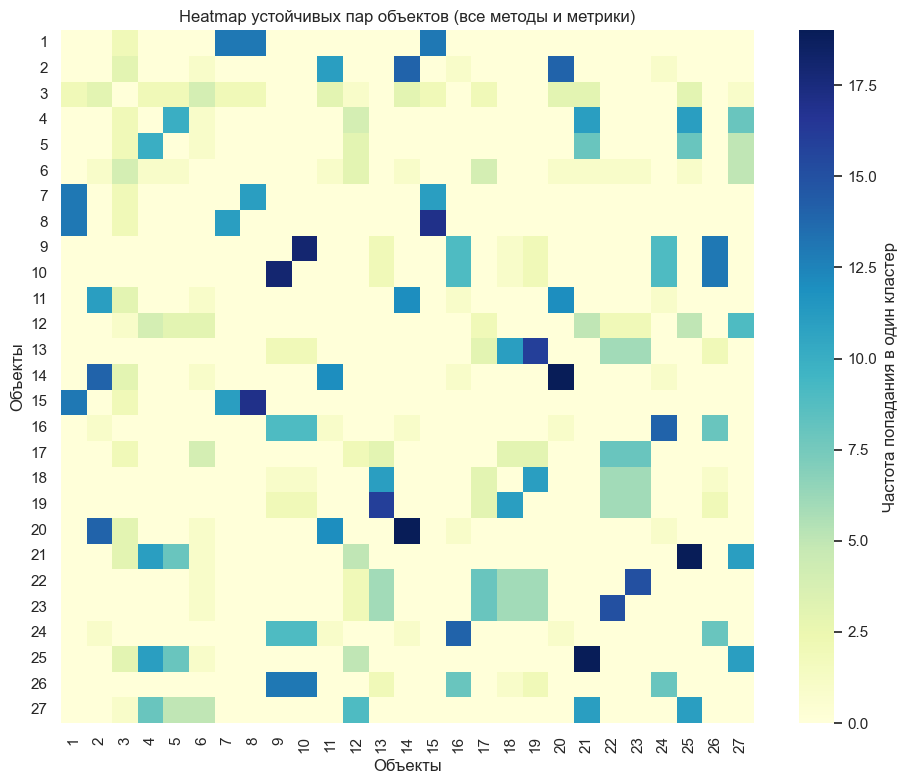

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø–æ–ª–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —É—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤—Å–µ—Ö 6 –∫–æ–º–±–∏–Ω–∞—Ü–∏–π
def build_pair_matrix(cluster_group, n_objs):
    matrix = np.zeros((n_objs, n_objs))
    for config in cluster_group:
        for cluster in config:
            for i in range(len(cluster)):
                for j in range(i + 1, len(cluster)):
                    a, b = cluster[i], cluster[j]
                    matrix[a, b] += 1
                    matrix[b, a] += 1
    return matrix

pair_matrix = build_pair_matrix(th_an, len(df))  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏
sns.set()

plt.figure(figsize=(10, 8))
sns.heatmap(pair_matrix, cmap="YlGnBu", square=True, cbar_kws={'label': '–ß–∞—Å—Ç–æ—Ç–∞ –ø–æ–ø–∞–¥–∞–Ω–∏—è –≤ –æ–¥–∏–Ω –∫–ª–∞—Å—Ç–µ—Ä'})
plt.title("Heatmap —É—Å—Ç–æ–π—á–∏–≤—ã—Ö –ø–∞—Ä –æ–±—ä–µ–∫—Ç–æ–≤ (–≤—Å–µ –º–µ—Ç–æ–¥—ã –∏ –º–µ—Ç—Ä–∏–∫–∏)")
plt.xlabel("–û–±—ä–µ–∫—Ç—ã")
plt.ylabel("–û–±—ä–µ–∫—Ç—ã")
plt.xticks(ticks=np.arange(len(df)) + 0.5, labels=[str(i+1) for i in range(len(df))], rotation=90)
plt.yticks(ticks=np.arange(len(df)) + 0.5, labels=[str(i+1) for i in range(len(df))], rotation=0)
plt.tight_layout()
plt.show()
